# P3 - Analyse et prédiction de données Covid-19

Léon Muller - Projet P3 - 2021/2022 - Haute Ecole Arc - Projet n°221

Superviseur: M. Ninoslav

![](https://i.imgur.com/o00mylA.jpg)

"Tous droits réservés"

# Sommaire

1. Introduction
2. Cahier des charges
	1. Récupération des données
	2. Visualisation des données
	3. Analyse des données et prédictions
3. Résumé
	1. Version française
	2. Version anglaise 
4. État de l'art
5. Planing
6. Récupération des données
7. Prétraitement
	1. Suppression des colonnes redondantes
	2. Analyse des NaN (Not a Number)
	3. Analyse de forme
	4. Analyse des corrélations
	5. Mise en forme
8. Prédictions
	1. Définitions
		1. Types d'algorithmes
		2. Types de problèmes
		3. Caractéristique d'un modèle
	2. Régression avec données
		1. Naive Bayes Classifier
			1. Gaussian
			1. Multinomial
		2. K-Nearest Neighbors
		3. Decision Trees
			1. Simple Decision Trees
			2. Random Forest
			3. Gradient Boosted Trees
		4. Support Vector Regression
		5. Multi-Layer Perceptrons (Deep Learning)
	3. Régression sans données
9. Conclusion
10. Bibliographie
	1. Sources documentaires
	2. Sources illustratives

# 1. Introduction

Depuis le début de la crise sanitaire de Covid-19 en 2020, nous avons connu un grand changement dans nos vies quotidiennes. Les routines ont changé, ainsi que notre façon de travailler, ou encore de nous comporter. Depuis presque 2 ans, cette maladie touche une grande quantité de personnes provoquant ainsi chez elles des symptomes allant des plus bénins aux plus mortels. Cette épidémie contraint les états à renforcer les campagnes de santé, appliquer des règles nouvelles, ainsi que forcer des populations entières au confinement. 

La Covid-19 est un virus qui mute au fil du temps, certaines mutations sont plus ou moins dangereuses et plus ou moins transmissibles. Ce qui rend ce virus imprévisible et compliqué à soigner complètement. Il n'existe encore aucun traitement à ce jour permettant de guérir et d'éradiquer cette maladie, il est donc primordial pour nous être Humain d'apprendre à vivre avec. 

Depuis le début de cette pandémie, dans presque tous les pays du monde, un grand nombre de données relatives au Covid-19 sont collectées. Ces données recensent le nombre de patients infectés, testés, guéris, le nombre de lits de réanimation libre, ou encore le taux de saturation des hopitaux, etc. Afin de permettre aux populations, mais aussi aux gouvernements de mieux se rendre compte de la situation actuelle, certaines solutions ont été mises en place telles que l'affichage sous forme de graphique des différentes données, le calcul de l'évolution semaine après semaine de la pandémie, ou encore l'affichage sur carte des zones les plus touchées. En effet, ces différentes représentations permettent de mieux comprendre et visualiser l'état actuel de la situation et de mieux comprendre la raison des décisions gouvernementales par exemple.

Enfin, grâce à la quantité de données récoltée, certains organismes tels que l'Institute for Health Metrics and Evaluation mettent en place des formes d'intelligence artificielle visant à prévoir l'évolution de la situation pandémique dans les semaines ou mois à venir. Ces solutions sont d'ores et déjà diverses et variées et n'apportent pas toutes les mêmes conclusion quant aux évolutions sanitaires. 

C'est pourquoi, dans ce projet l'objectif est de collecter et analyser les données Covid-19 pour différents pays et régions. Nous ferons des analyses statistiques et proposerons différentes méthodes de visualisation. En outre, nous essaierons de faire des prédictions et comparer les solutions trouvées à celles déjà existantes pour en montrer ou non la pertinence. 

Ce projet se découpe donc en trois grandes parties : récupération de données, visualisation des données récupérées, ainsi que prédictions des futurs évènements.

**Récupération de données**

Au début du projet, il faudra chercher et choisir une base de données viable et libre d'accès pour entrainer le modèle de machine learning. Il faudra ensuite choisir les données à traiter, ainsi que mettre en place une manière de traiter les données récoltées.

**Visualisation des données**

Par la suite, il faudra chercher, choisir et représenter les données sous la forme la plus adaptée et compréhensible possible (graphiques, diagrammes ...). Par la suite, il sera nécessaire de choisir les différents paramètres pris en compte pour l'affichage des données (catégorie, temporalité ...). 
Pour cela, il faudra au préalable prendre en main des outils de visualisation tels que Pandas ou Seaborn.

**Analyse de données et prédictions**

Enfin, il faudra chercher, comparer, choisir et tester le/les modèle(s) d'apprentissage automatique utilisé(s) permettant la prédiction du nombre de nouveaux morts chaque jour. Pour cela, il faudra au préalable prendre en main des outils de machine learning tels que Scikit-learn. Pour finir, le nombre de nouveaux morts chaque jour devra être affiché en rapport aux données récoltées au préalable.

**A noter**

Ce notebook inclu rapport et code, chaque partie est donc détaillée afin d'expliquer au mieux les différents scipts réalisées. En effet, chaque morceau de code est expliqué et est intéractif, il est donc possible de lancer le notebook afin d'observer les résultats en temps réel. Cependant, certains scripts ont besoin de beaucoup de temps pour s'exécuter, il est donc déconseillé de lancer l'intégralité du notebook d'un coup. Les cases prenant le plus de temps à s'exécuter sont celles entrainant les modèles d'apprentissage automatique complexes.

# 2. Cahier des charges

L'intitulé du projet P3 est "Analysis and prediction of Covid-19 data using Python".
Ce projet a pour but de récolter des données sur le Covid (nombre de morts, de vaccinés, de lits de réanimation libres, etc ...) afin de les affichés de manière intuitive, compréhensive et utile. Pour ce faire, il sera nécessaire de former avec ces différentes données des schémas, diagrammes, cartes interactives, etc... pour permettre une visualisation la plus claire et pertinente possible. De plus, il faudra analyser ces différentes données afin de pouvoir en prédire les évolutions à venir.

Ce projet se découpe donc en trois grandes parties : récupération d'un set de données, visualisation des données récupérées, ainsi que prédictions des futurs évènements.

## 2.1 Récupération des données

- Recherche et choix de bases de données viables pour entrainer le modèle de machine learning, et libres d'accès
- Choix des données à traiter
- Mise en place d'un parseur pour traiter les données récoltées

Ex: our world in data

## 2.2 Visualisation des données

- Chercher, choisir et représenter les données sous la forme la plus adaptée et compréhensible possible (graphiques, diagrammes, ...)
- Choisir les différents paramètres pris en compte pour l'affichage des données (catégorie, temporalité, ...)
- Prise en mains des outils de visualisation tels que Pandas ou Seaborn

Voici quelques idées de données pertinentes à afficher :

- Couverture vaccinale (1e et 2nd dose)
- Nombre de tests positifs/négatifs (vaccinés ou non)
- Nombre d'hospitalisations
- Nombre d'admis en réanimation (vaccinés ou non)
- Nombre de nouveaux cas pour les mutations
- Taux de reproduction effectif (nombre de personnes contaminées par personne positive)
- Tension des reanimation
- Positifs, morts etc en cummulés
- Centres de dépistage sur une carte avec la position actuelle de l'ordinateur
- Carte des nombre de cas, lit de rea dispo, etc

Ce projet peut s'inspirer de sites internet ou applications déjà existantes permettant la visualisation de données liées au Covid tels que : https://www.gouvernement.fr/info-coronavirus/carte-et-donnees

Voici aussi quelques exemples de façons de représenter les données récoltées :

<img src="https://i.imgur.com/mGcibKB.png" height="200"/>
<img src="https://i.imgur.com/qUUrw4Q.png" height="200"/>
<img src="https://i.imgur.com/dO0Ysa3.png" height="200"/>
<img src="https://i.imgur.com/9sQqpWY.png" height="200"/>
<img src="https://i.imgur.com/VSm6qHf.png" height="200"/>

> Différentes captures d'écran provenant d'applications ou de site web (TousAntiCovid, CovidTracker, SwissInfo, ...) mettant en avant la situation du Covid-19 

## 2.3 Analyse des données et prédictions

- Recherche et choix du/des modèle(s) utilisé(s) pour la prédiction des données
- Prise en mains des outils de machine learning tels que Tensorflow ou Keras
- Comparaison de différents modèles de machine learning afin d'en déterminer le/les meilleur(s)
- Test du/des modèle(s) de machine learning sélectionné(s) et réflexion sur leur efficacité
- Affichage des données prédites en rapport avec les données récoltées au préalable

# 3. Résumé

## 3.1 Version française

Ce projet a pour sujet "Analysis and prediction of Covid-19 data using Python". Le projet a pour but d'utiliser une base de données libre d'accès et mise à jour quotidiennement afin d'en extraire des données utiles, et ainsi tenter de prédire certaines données avant qu'elles ne soient révélées. Pour ce projet a été choisi comme donnée de prédiction, le nombre de mort du Covid chaque jour. L'objectif est donc de prédire cette information grâce aux autres données disponibles dans la base de données récupérée. 

Dans un premier temps, une base de données provenant de 'Our world in data' a été choisie. Cette base de données recense chaque jour des milliers d'informations liées au Covid-19 dans près de 250 pays du monde. Il est ensuite nécessaire de filtrer ces données pour n'en garder que les plus pertinentes. Pour ce faire, différentes analyses ont été réalisées permettant de supprimer les données dont la quantité récoltée est trop faible, mais aussi de ne garder que les données ayant un lien avec le nombre de morts par jour, ou encore les données redondantes telles que le nombre de cas positif au Covid par milliers, par millions, etc. De plus, dans le cadre de ce projet, seules les données provenant de la Suisse ont été utilisées.

Une fois les données filtrées et analysées, elles ont été utilisées afin d'entrainer des algorithmes d'apprentissage automatique. Plusieurs algorithmes ont été entrainés pour pouvoir les comparer, comprendre leur fonctionnement, les optimiser et ainsi trouver celui ayant les meilleures performances, ce qui donc permet de prédire au mieux le nombre de morts du Covid chaque jour. Les différentes prédictions et données récoltées chaque jour ont été représentées sur des graphiques permettant visuellement de comprendre les résultats obtenus. Il est ainsi possible de voir comment se comporte chaque algorithme, et d'en faire des déductions.

Cependant, cette méthode ne permet que de prédire par exemple le nombre de morts du jour actuel en utilisant les données de ce jour. J'ai donc tenté d'aller plus loin, et de prédire le nombre de morts pour la ou les semaines à venir, mais évidemment sans données. Cette tentative soulève des questions et amène à des améliorations quant à la méthode et justesse de la prédiction de données dans le futur.

## 3.2 Version anglaise 

This project is about "Analysis and prediction of Covid-19 data using Python". The aim of the project is to use an open source database that is updated daily to extract useful data, and thus attempt to predict certain data before they are revealed. For this project, the number of Covid deaths per day was chosen as the predictive data. The objective is to predict this information thanks to the other data available in the recovered database. 

In a first step, a database from 'Our world in data' was chosen. This database lists thousands of pieces of information related to Covid-19 in nearly 250 countries around the world every day. It is then necessary to filter this data to keep only the most relevant. To do this, various analyses were carried out to remove data whose quantity collected is too small, but also to keep only data related to the number of deaths per day, or redundant data such as the number of Covid-positive cases per thousand, per million, etc. In addition, only data from Switzerland was used in this project.

Once the data was filtered and analysed, it was used to train machine learning algorithms. Several algorithms were trained in order to compare them, understand how they work, optimise them and find the one with the best performance, which therefore allows the best prediction of the number of Covid deaths each day. The different predictions and data collected each day have been represented on graphs allowing a visual understanding of the results obtained. It is thus possible to see how each algorithm behaves, and to make inferences.

However, this method can only predict, for example, the number of deaths on the current day using the data for that day. I have therefore tried to go further and predict the number of deaths for the coming week(s), but obviously without data. This attempt raises questions and leads to improvements in the method and accuracy of predicting data in the future.

# 4. État de l'art

TODO

État de l'art

Domaines dans lesquels on pourrait utiliser aussi ce projet

# 5. Planing

Au début du projet, un planing a été réalisé afin de diviser le projet en plusieurs tâches, et ainsi permettant de voir l'avance ou le retard pris régulièrement en fonction des objectifs fixés. Les différentes tâches ont été regroupées en troids grandes parties: récupération des données, prédiction, visualisation.

<img src="https://i.imgur.com/J7oYvJ3.png" height="500">

Le planing a été en majorité respecté. Cependant, les étapes de visualisation des données ont été réalisées en parallèle des étapes de prédiction et de prise en main des modèles de machine learning. Il était nécessaire de pouvoir constater visuellement les données résultant des prédictions des différents modèles. De plus, le choix de base de données et donc la partie traitement des données a été bien plus longue que prévue initialement.

Une adaptation du planing a donc du être réalisée, et les écarts engendrés ont pu être rattrapés avec une charge de travail plus importantes durant certaines semaines. 

# 6. Récupération des données

## 6.1 Mise en place de l'espace de travail

Visualisation: 
- Matplotlib: Diagrammes simples et compréhensifs
- Seaborn: Diagrammes complexes et complets
- Plotly: Diagrammes interactifs

Représentation:
- Numpy: Représentation simpliste des données
- Pandas: Représentation des données sous forme de tableau labélisé

Machine learning:
- Scikit-learn: Modèles de machine learning, évaluation des modèles, mise en forme des données. Cette bibliothèque permet une première approche du machine learning, elle ne possède donc pas des modèles avancés, et tourne uniquement sur CPU (ce qui est une problème en terme de performances).

In [2]:
import sys 
sys.dont_write_bytecode = True # Stop creating __pycache__ folder

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from toolbox import * # My own toolbox

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## 6.2 Les données

Our World In Data est un site internet recensant un nombre impressionnant de données sur tout type de sujets à travers le monde. Les publications présentent sur le site sont dirigées par l'université d'Oxford et rédigées par l'historien social et économiste du développement Max Roser.

Ce site internet met à disposition une base de données accessible via GitHub: https://github.com/owid/covid-19-data/tree/master/public/data, ou directement sur leur site internet: https://ourworldindata.org/coronavirus.

Il y a à disposition plusieurs formats afin de récupérer cette base de données: csv, xlsx ou json. Json étant un format plus simple de compréhension, c'est celui qui a été choisit. Cette base de données est tenue à jour et est actualisée quotidiennement, ainsi les données traitées dans ce projet seront toujours actualisées.

Grâce à la bibliothèque Pandas, on peut récupérer les données en passant l'URL de recherche à la méthode `read_json`. 

In [3]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.json'
json = pd.read_json(url)

Une fois les données récoltées, il va falloir les traiter afin d'en extraire les parties importantes et utiles. 

Dans le cadre de ce projet, nous allons traiter les données relatives à la Suisse, en utilisant donc l'ISO `CHE`. Les données Covid de chaque jour se trouvent ensuite dans la partie `data` de la base de données. 

On peut voir avec `tail`, que les données sont bien actualisées chaque jour. On peut aussi voir la forme des données, ainsi que les différentes informations contenues dans cette base de données. En effet, 45 données différentes sont récoltées chaque jour en Suisse, ce nombre peut varier en fonction du pays que l'on souhaite traiter.

In [4]:
data = json['CHE']['data']
df = pd.DataFrame(data)
df.tail()

,date,total_cases,new_cases,total_cases_per_million,new_cases_per_million,stringency_index,new_cases_smoothed,new_cases_smoothed_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,...,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,total_boosters,total_boosters_per_hundred
695,2022-01-20,1841317.0,39795.0,211269.378,4566.006,NaN,29579.857,3393.939,605.0,69.417,...,172.22,69.39,67.71,51940.0,50749.0,5823.0,3945.0,0.045,3164694.0,36.31
696,2022-01-21,1879319.0,38002.0,215629.659,4360.281,NaN,30411.143,3489.319,545.0,62.532,...,172.84,69.43,67.74,53892.0,47263.0,5423.0,3847.0,0.044,3211237.0,36.85
697,2022-01-22,1879319.0,0.0,215629.659,0.000,NaN,30411.143,3489.319,NaN,NaN,...,173.16,69.47,67.76,28184.0,45234.0,5190.0,3437.0,0.039,3233618.0,37.10
698,2022-01-23,1879319.0,0.0,215629.659,0.000,NaN,30411.143,3489.319,NaN,NaN,...,173.23,69.49,67.76,5997.0,44243.0,5076.0,3269.0,0.038,3237785.0,37.15
699,2022-01-24,1966600.0,87281.0,225644.123,10014.464,NaN,33179.143,3806.915,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dans cette base de données, se trouvent aussi quelques informations à propos de chaque pays: le continent, la population, l'âge médian, le nombre de lits d'hôpitaux, etc. Toutes ces informations ne seront pas utilisées dans le cadre de ce projet, mais peuvent avoir une importance lors de la comparaison entre les données de différents pays.

In [5]:
for key, value in json['CHE'].items(): 
	if key != 'data':
		print(f"{key}: {value}")

print(f"\n\nData gathered on {len(df)} days, from {df['date'][0]} to {df['date'][len(df) - 1]}.")

continent: Europe
location: Switzerland
population: 8715494.0
population_density: 214.243
median_age: 43.1
aged_65_older: 18.436
aged_70_older: 12.644
gdp_per_capita: 57410.166
cardiovasc_death_rate: 99.739
diabetes_prevalence: 5.59
handwashing_facilities: nan
hospital_beds_per_thousand: 4.53
life_expectancy: 83.78
human_development_index: 0.9550000000000001
extreme_poverty: nan
female_smokers: 22.6
male_smokers: 28.9


Data gathered on 700 days, from 2020-02-25 to 2022-01-24.


# 7. Prétraitement

Dues à la grande taille de la base de données, ces données brutes sont généralement de faible qualité. Elles peuvent être incomplètes (valeurs manquantes), bruitées (valeurs erronées ou aberrantes) ou incohérentes (divergence entre attributs). Il est donc nécessaire d'effectuer un prétraitement sur ces données, d’améliorer la qualité des données.

Dans cette partie, on va donc modifier, travailler les données à disposition grâce à `Pandas`, afin de supprimer les parties inutilisées, d'uniformiser les données, et ainsi ne travailler que sur des données pertinentes par la suite.

Étant donné que l'intégralité du projet se trouve dans ce notebook, il est vivement recommandé de ne jamais travailler directement sur le dataframe collecté, mais de passer par des copies pour pouvoir à tout moment récupérer à nouveau les données brutes.

In [6]:
df_proc = df

## 7.1 Suppression des colonnes redondantes

Dans la base de données se trouvent des colonnes redondantes, colonnes n'apportant aucune nouvelle information telles que le nombre de nouveaux cas par millions d'habitants, le nombre de cas lissé, etc. Toutes ces colonnes ne seront pas utiles pour entrainer les modèles de machine learning, il faut donc les supprimer. 

In [7]:
df_proc = df_proc.drop(list(df_proc.filter(regex='smoothed|million|hundred|thousand')), axis=1)
print(df_proc.columns)

Index(['date', 'total_cases', 'new_cases', 'stringency_index',
       'weekly_hosp_admissions', 'excess_mortality_cumulative_absolute',
       'excess_mortality_cumulative', 'excess_mortality', 'total_deaths',
       'new_deaths', 'reproduction_rate', 'icu_patients', 'hosp_patients',
       'new_tests', 'total_tests', 'positive_rate', 'tests_per_case',
       'tests_units', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'new_vaccinations', 'total_boosters'],
      dtype='object')


## 7.2 Analyse des NaN (Not a Number)

Dans notre base de données se trouvent des colonnes qui sont peu remplies (case remplie avec NaN), en effet les données collectées sur ces sujets n'ont pas été récupérées tous les jours, ou n'ont pas été collectées depuis le début de l'épidémie.

En effet, on peut voir sur le graphique ci-dessous le taux de données non répertoriées (en beige) pour chacune des colonnes de la base de données. Certaines données ne sont pas récoltées chaque jour (ex: weekly hosp admissions), et d'autres n'ont commencé à être récoltées qu'un certain temps après le début de la pandémie (ex: new vaccinations).

<AxesSubplot:>

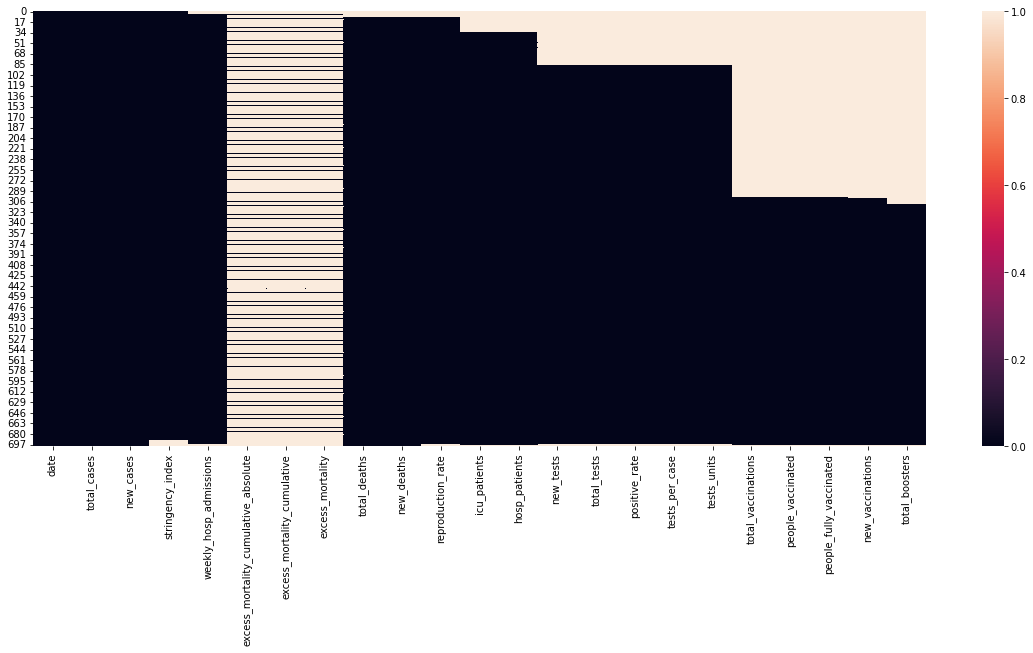

In [8]:
plt.figure(figsize=(20,8))
sns.heatmap(df_proc.isna())

Voici aussi, sous forme textuelle, le schéma présent ci-dessus:

In [9]:
# Trie de différentes données pour voir lesquelles possèdent le plus de NaN
missing_rate = df_proc.isna().sum() / df_proc.shape[0]
print("Missing rate:")
print(round(missing_rate.sort_values(ascending=False), 3))

Missing rate:
excess_mortality_cumulative_absolute    0.861
excess_mortality_cumulative             0.861
excess_mortality                        0.861
total_boosters                          0.446
new_vaccinations                        0.431
people_fully_vaccinated                 0.430
people_vaccinated                       0.430
total_vaccinations                      0.430
new_tests                               0.129
tests_units                             0.129
tests_per_case                          0.129
positive_rate                           0.129
total_tests                             0.129
icu_patients                            0.050
hosp_patients                           0.050
reproduction_rate                       0.019
new_deaths                              0.014
total_deaths                            0.014
stringency_index                        0.013
weekly_hosp_admissions                  0.011
total_cases                             0.000
new_cases           

Les données étant collectées que depuis moins de 2 ans, la base de données mise à disposition est donc de faible taille. Il a donc fallu garder un maximum de colonnes, sans pour autant fausser les résultats pouvant se baser sur une partie trop importante de données manquantes. Nous avons donc choisi de ne travailler que sur les colonnes contenant au moins 50% de données depuis le début de l'épidémie. Voici donc les différentes données restantes récoltées chaque jour disponibles après ce deuxième traitement:

In [10]:
# Suppression des colonnes qui ont moins de 50% des données
df_proc = df_proc.drop(df_proc.columns[missing_rate > 0.5], axis=1)
print(df_proc.columns)

Index(['date', 'total_cases', 'new_cases', 'stringency_index',
       'weekly_hosp_admissions', 'total_deaths', 'new_deaths',
       'reproduction_rate', 'icu_patients', 'hosp_patients', 'new_tests',
       'total_tests', 'positive_rate', 'tests_per_case', 'tests_units',
       'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
       'new_vaccinations', 'total_boosters'],
      dtype='object')


## 7.3 Analyse de forme

Étant donné que le but du projet est de prédire le nombre de nouveaux morts par jour, nous allons travailler sur des modèles de machine learning basés sur la régression: prédire un nombre le plus proche de la réalité possible. Il est donc nécessaire de ne travailler que sur des données sous formes numériques, ainsi vérifions le type de données présentes.

> On doit tout de même garder la colonne `date` sous forme non numérique, car cette colonne deviendra par la suite l'axe des abscisses de tous les graphiques.

tests_units------------------- ['-' 'tests performed']


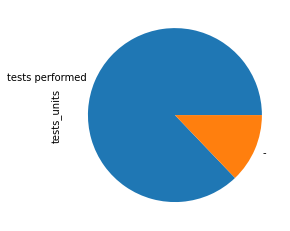

In [11]:
for col in df_proc.select_dtypes('object'):
	if col != 'date':
		df_proc[col] = df_proc[col].fillna('-')
		plt.figure()
		df_proc[col].value_counts().plot.pie()
		print(f'{col :-<30} {df_proc[col].unique()}')

La colonne `tests_units` n'est pas sous forme numérique, il faut donc la supprimer de nos données. Pour ce faire, on supprime donc toutes les colonnes qui sont sous la forme 'object', cependant cette méthode supprime aussi la colonne `date`, il faudra donc la rajouter par la suite, mais pour l'instant la supprimer aussi n'a pas d'importance. Voici donc les différentes données restantes récoltées chaque jour disponibles après ce troisième traitement:

In [12]:
df_proc = df_proc.select_dtypes(exclude=['object'])
print(df_proc.columns)

Index(['total_cases', 'new_cases', 'stringency_index',
       'weekly_hosp_admissions', 'total_deaths', 'new_deaths',
       'reproduction_rate', 'icu_patients', 'hosp_patients', 'new_tests',
       'total_tests', 'positive_rate', 'tests_per_case', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'total_boosters'],
      dtype='object')


## 7.4 Analyse des corrélations

Afin de supprimer les colonnes ne permettant pas d'aider le modèle de machine learning à mieux prédire le nombre de morts chaque jour, il est nécessaire d'effectuer une analyse de corrélation entre les différentes informations contenues dans la base de données. La corrélation mesure une dépendance linéaire entre deux variables. L'analyse de corrélation permet donc d’étudier la dépendance entre le nombre de morts chaque jour et les autres informations à disposition.

On peut représenter ces corrélations grâce à une matrice de corrélation. Cette matrice de corrélation représente donc pour chaque information le niveau de dépendance avec les autres informations: lorsque la corrélation est proche de 1 (beige) ou -1 (noir) les deux informations sont dépendantes l'une de l'autre, plus cette valeur se rapproche de 0 moins la dépendance est forte.

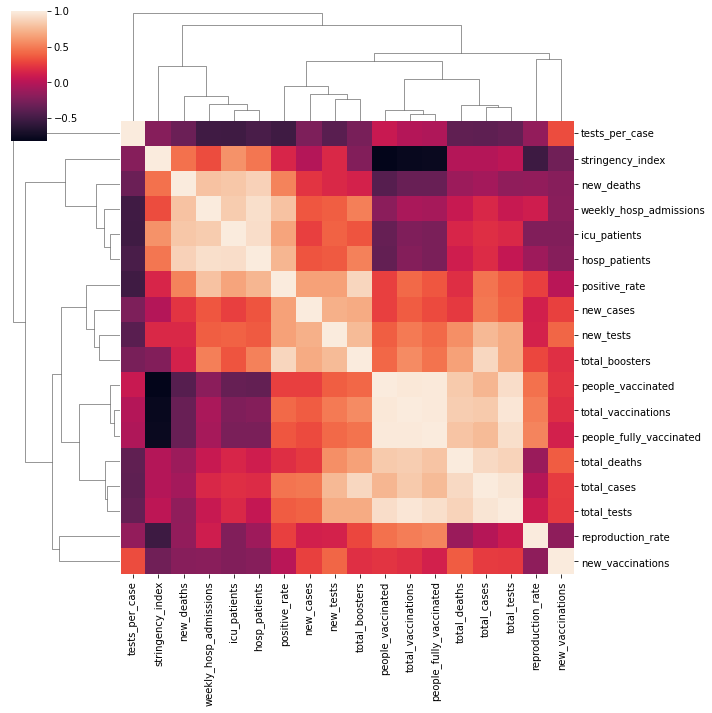

In [13]:
sns.clustermap(df_proc.corr())

Ici, il est seulement nécessaire de se focaliser sur les corrélations en rapport avec ce qui sera prédit: `new_deaths`. 

In [14]:
correlations = df_proc.corr()['new_deaths']
print("Correlations to new_deaths:")
print(round(correlations.sort_values(ascending=False), 3))

Correlations to new_deaths:
new_deaths                 1.000
hosp_patients              0.879
icu_patients               0.827
weekly_hosp_admissions     0.803
positive_rate              0.525
stringency_index           0.458
new_cases                  0.228
new_tests                  0.171
total_boosters             0.137
total_cases               -0.075
total_deaths              -0.108
reproduction_rate         -0.154
total_tests               -0.164
new_vaccinations          -0.197
tests_per_case            -0.317
people_fully_vaccinated   -0.330
total_vaccinations        -0.330
people_vaccinated         -0.406
Name: new_deaths, dtype: float64


Plus le coefficient de corrélation est proche des valeurs extrêmes -1 et 1, plus la corrélation linéaire entre les variables est forte. On ne souhaite donc garder que les colonnes ayant une corrélation absolue avec `new_deaths` supérieure à 0.7.

![](https://i.imgur.com/VcJvg8V.png)

>http://www.sthda.com/french/wiki/test-de-correlation-formule

In [15]:
# On supprime les colonnes ayant une corrélation absolue inférieure à 0.7
df_proc = df_proc.drop(df_proc.columns[abs(correlations) < 0.7], axis=1)

# On rajoute la colonne date que l'on a supprimée dans l'analyse de forme, et qui n'était pas utile dans l'analyse de correlations.
df_proc['date'] = df['date']

Voici donc les colonnes qui seront utilisées pour l'entraînement des modèles de machine learning.

In [16]:
df_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   weekly_hosp_admissions  692 non-null    float64
 1   new_deaths              690 non-null    float64
 2   icu_patients            665 non-null    float64
 3   hosp_patients           665 non-null    float64
 4   date                    700 non-null    object 
dtypes: float64(4), object(1)
memory usage: 27.5+ KB


## 7.5 Mise en forme

Une fois les colonnes utiles sélectionnées, il est nécessaire d'effectuer une mise en forme des données disponibles, car un certain nombre de données ne sont pas représentées, ou sont négatives or c'est tout simplement impossible.

On peut donc voir ci-après les différentes informations disponibles en fonction du temps qui seront utiles:

In [17]:
for column in df_proc.columns:
  if column == 'date':
    continue

  fig = go.Figure([go.Scatter(x=df_proc['date'], y=df_proc[column])])
  fig.update_layout(
    title={
      'text': column,
      'xanchor': 'center',
      'yanchor': 'top'
    },
    xaxis_title='date',
    yaxis_title=column,
  )
  fig.show()

En observant attentivement le schéma du nombre de nouveaux morts chaque jour, il est possible d'apercevoir une saisonnalité, particularité que l'on ne retrouve que sur ce graphe. En effet, chaque week-end, le nombre de morts n'est pas forcément rempli, cela est flagrant entre octobre 2021 et janvier 2022: le nombre de morts chaque week-end est presque tout le temps nul. 

Cette saisonnalité est un réel problème dans cette base de données, car à conditions égales et en fonction du jour de la semaine, les données rapportées ne seront pas les mêmes. Le choix de supprimer l'intégralité des week-ends de la base de données a donc été fait, afin de ne pas induire le modèle de machine learning en erreur.

D'autres approches auraient pu être: de rajouter le jour dans une nouvelle colonne de la base de données, mais cette solution n'est pas suffisament prise en compte par le modèle de machine learning. Ou encore de remplacer le nombre de morts du week-end par la moyenne pondérée des jours précédents et suivants, or le but est de prédire des données, il est n'est donc pas viable de n'utiliser seulement les données des jours précédents.

TODO pas ouf comme explication

TODO schéma ?

In [18]:
# Remove week-ends
df_proc['date'] = pd.to_datetime(df_proc['date'])
df_proc = df_proc.drop(df_proc[df_proc['date'].dt.day_name() == 'Saturday'].index)
df_proc = df_proc.drop(df_proc[df_proc['date'].dt.day_name() == 'Sunday'].index)

# TODO Remove or use another way
# Add weekday number to data
# df_proc['date'] = pd.to_datetime(df_proc['date'])
# df_proc['weekday'] = df_proc['date'].dt.dayofweek

On veut maintenant pouvoir remplir les données qui ne sont pas représentées. Pour ce faire, nous avons choisit de récupérer la valeur la plus proche pour chaque donnée manquante et remplir la base donnée avec ces informations. Cela permet de ne pas avoir de saut de données tout en gardant un maximum de données réelles pour entrainer le modèle de machine learning.

Une fois les données manquantes remplies, il faut supprimer les données négatives, car il est impossible qu'un nombre de morts soit négatif par exemple.

In [19]:
# Fill all the NaN values with nearest value
df_proc = df_proc.fillna(method="bfill").fillna(method="ffill")
print(f"Any NaN remaining: {df_proc.isnull().sum().any()}")

# Remove rows with negative values because it's not possible
df_proc = df_proc[df_proc.select_dtypes(include=[np.number]).ge(0).all(1)] 

Any NaN remaining: False


In [20]:
for column in df_proc.columns:
  if column == 'date' or column == 'weekday':
    continue

  fig = go.Figure([go.Scatter(x=df_proc['date'], y=df_proc[column])])
  fig.update_layout(
    title={
      'text': column,
      'xanchor': 'center',
      'yanchor': 'top'
    },
    xaxis_title='date',
    yaxis_title=column,
  )
  fig.show()

Le problème avec ce remplissage des données est que pour les colonnes `hosp_patients` et `icu_patients` ce remplissage n'est pas bien réalisé et ne peut pas être effectué simplement. Ces informations n'ont pas été récoltées depuis le début de la crise, et poseront problème au modèle. Pour palier à ce problème, nous avons choisi de supprimer l'intégralité des données récoltées avant le 30-03-2020.

In [21]:
df_proc = df_proc.loc[(df_proc['date'] >= '2020-03-30')]

In [22]:
for column in df_proc.columns:
  if column == 'date' or column == 'weekday':
    continue

  fig = go.Figure([go.Scatter(x=df_proc['date'], y=df_proc[column])])
  fig.update_layout(
    title={
      'text': column,
      'xanchor': 'center',
      'yanchor': 'top'
    },
    xaxis_title='date',
    yaxis_title=column,
  )
  fig.show()

Comme on peut le voir sur les graphes ci-dessus, une seule valeur est vraiment abérente compte tenu des données adjacentes, il est donc nécessaire de la supprimer. Cependant, les données sont bien trop disparates, et il n'est donc pas possible de supprimer cette donnée automatiquement sans pour autant modifier les informations jugées correctes. La valeur que l'on retrouve le 09-02-2020 est donc retirée manuellement, permettant ainsi de lisser les données.

In [23]:
# On veut retirer l'outlier de new_deaths du 9 février 2021
df_proc = df_proc[df_proc['date'] != '2021-02-09']

In [24]:
fig = go.Figure([
  go.Scatter(x=df_proc['date'], y=df_proc['new_deaths'])
])
fig.update_layout(
  title={
    'text': column,
    'xanchor': 'center',
    'yanchor': 'top'
  },
  xaxis_title='new_deaths',
  yaxis_title=column,
)
fig.show()

A travers cette partie, le prétraitement et l'analyse des différentes données ont été réalisés. En effet, la base de données a été réduite afin de ne conserver que les données utiles permettant au mieux par la suite d'entrainer les modèles d'apprentissage automatique. Durant ce prétraitement, la base de données a été vidée de redondance de données, de valeurs Null ou négatives, de saisonnalité ou encore de données non corrélées au nombre de mort quotidien. La base de données est donc prête à servir pour l'entrainement de modèles d'apprentissage automatique.

# 8. Prédictions

## 8.1 Définitions

Ces dernières années, les méthodes d'apprentissage automatique sont devenues omniprésentes dans la vie quotidienne. Des recommandations automatiques de films à regarder, de plats à commander ou de produits à acheter, la radio en ligne personnalisée ou la reconnaissance de vos amis sur vos photos, de nombreux sites Web et appareils modernes sont dotés d'algorithmes d'apprentissage automatique.

L'apprentissage automatique, aussi appelé "machine learning", est une sous-catégorie de l'intelligence artificielle qui est la capacité d'une machine à imité le comportement humain. L'intelligence artificielle est utilisée pour effectuer des tâches complexes d'une manière similaire à la façon dont les humains résolvent les problèmes.

### 8.1.1 Types d'algorithmes

Il existe deux types d'algorithmes d'apprentissage:
- Supervisé: algorithmes qui automatisent le processus de décision en généralisant à partir d'exemples connus. Dans ce cas, l'utilisateur fournit à l'algorithme des paires d'entrées et de sorties souhaitées, et l'algorithme trouve un moyen de produire la sortie souhaitée à partir d'une entrée. En effet, l'algorithme est capable de créer une sortie pour une entrée qu'il n'a jamais vue auparavant sans aucune aide.
- Non supervisés: dans ce type d'algorithmes, seules les données d'entrée sont connues, et aucune donnée de sortie connue n'est donnée à l'algorithme. 

Dans notre cas, comme les données à prédire sont connues, nous utiliserons des algorithmes d'apprentissage supervisé.

### 8.1.2 Types de problèmes

Dans ce type d'algorithmes, il existe deux types de problèmes d'apprentissage supervisé:
- Regression: l'objectif est de prédire un nombre continu. (Ex: prédire le prix d'une maison)
- Classification: l'objectif est de prédire une classe, qui est un choix parmi une liste prédéfinie de possibilités. (Ex: prédire la race d'un animal)

Dans notre cas, comme les données à prédire sont le nombre de nouveaux morts par jour, nous sommes dans un cas de régression.

### 8.1.3 Caractéristique d'un modèle

Dans l'apprentissage supervisé, nous voulons construire un modèle à partir de données, et être ensuite capables de faire des prédictions précises sur de nouvelles données. Si un modèle est capable de faire des prédictions précises sur des données inconnues, on dit qu'il est capable de généraliser de l'ensemble d'apprentissages à l'ensemble de tests. Nous voulons construire un modèle capable de généraliser aussi précisément que possible.

Une possibilité lors de l'entrainement du modèle est l'`overfitting`: le modèle a tendance à essayer de recopier à la perfection les données d'entrainement, il ne sera donc plus capable de prédire des données inconnues car il est devenu trop spécialisé. Le cas contraire est aussi possible l'`underfitting`: le modèle généralise tellement les données qu'il a comme entrainement, qu'il n'est plus capable de prédire des valeurs précises. Ces deux problèmes surviennent lors du choix des paramères du modèle (partie qui sera traitée par la suite), il faut donc conserver un esprit critique car une évaluation parfaite face aux données d'entrainement n'implique pas forcément une prédiction parfaite par la suite.

## 8.2 Régression avec données

Maintenant que les données récoltées ont été traitées pour être utilisées au mieux, il va nous être possible de les utiliser afin d'entrainer un modèle de machine learning et de pouvoir prédire des données que nous ne connaissons pas encore. Dans notre cas, nous utiliserons l'apprentissage automatique afin de pouvoir prédire le nombre de nouveaux morts chaque jour à cause du Covid-19. 

Dans le cadre de ce projet, la temporalité des données est une informations très importante, nous allons donc travailler autour de cette caractéristique en posisitionnant la colonne `date` comme index du tableau de données.

In [25]:
df_used = df_proc
df_used = df_used.set_index('date')

**Division des données:**

Afin d'évaluer au mieux les performances d'un modèle de machine learning, il faut découper les données en trois grandes parties:
- les données d'entrainement (`train set`)
- les données de validation (`validation set`)
- les données de test (`test set`)

Pour commencer, il faut diviser en deux groupes les données de base: données de test, et données d'entrainement, en donnant un plus grande part aux données d'entrainement. Dans notre cas, il faut aussi prendre en compte la temporalité, il faut donc que les données d'entrainement soient au début, et les données de test à la fin. TODO 80%
Une fois les données divisées en deux catégories, il faut mettre de côté les données de test, ce sont les données qui nous permettront d'évaluer les différents modèles sur des données qu'ils ne connaissent pas.

<img src="https://i.imgur.com/JITVKcx.png" height="300">

Ensuite, pour évaluer un modèle lors de son entrainement, il est nécessaire de récupérer une partie des données restantes (données d'entrainement) afin de former les données de validation. Afin d'éviter tout biais dans l'apprentissage du modèle, il est nécessaire d'utiliser un `K-Fold cross validation` permettant de faire varier les données d'entrainement et les données de validation lors de l'apprentissage. Ce `K-Fold cross validation` divise en K parties les données d'entrainement, et forme une partie avec les données de validation, afin de tester toutes les combinaisons possibles d'entrainement.

<img src="https://i.imgur.com/VZrQkkD.png" height="300">

Cependant, dans ce projet, la temporalité des évènements importe énormément, il n'est donc pas viable d'utiliser un `K-Fold cross validation`, il faut plutot utiliser les `TimeSeriesSplit`. Cette classe permet d'effectuer de la même manière qu'un K-Fold, une séparation en K parties des données d'entrainement. Cependant, pour chaque entrainement du modèle, on utilise les données des entrainements précédents, ainsi que les 'nouvelles' données d'entrainement, le tout en fonction du temps.

<img src="https://i.imgur.com/ZDkrK1m.png" height="300">

**Evaluation des modèles:**

Après avoir entrainer les différents modèles de machine learning, il est nécessaire de les évaluer pour en déterminer les performances. Afin d'évaluer les différents modèles de machine learning, il faut déterminer une fonction d'évaluation qui sera utilisée par la suite pour évaluer tous les modèles. Pour ce faire, j'ai choisi la fonction `r2`, cette fonction représente le taux de corrélation des valeurs prédites avec les vraies données. Cette fonction d'évaluation a la particularité d'être normalisée, et d'être sous la forme d'un pourcentage, il est donc plus simple d'en interpréter les résultats. Cependant, il faut faire attention, car si les prédictions sont fortement anti-corrélées aux vraies données, le résultat sera aussi élevé.

**Comparaison avec une ligne de base:**

Pour voir si le modèle évalué est performant, il est nécessaire de le comparer avec une méthode dite 'naïve' de prédiction de données. En effet, si utiliser l'aléatoire est plus performant que de passer par le modèle de machine learning entrainé, c'est que le modèle n'est pas efficace. Comme dans ce projet, la temporalité des données est importante, j'ai choisi comme ligne de base de récupérer pour chaque jour le nombre de morts du jour précédent. Voici ci-dessous un exemple, avec les données représentés par des points orange, et la ligne de base décrite précédemment représentée par des traits orange. On voit ainsi bien le décalage d'un jour effectué.

<img src="https://i.imgur.com/fFW9qbd.png" height="300">

In [26]:
from sklearn.model_selection import TimeSeriesSplit

X_train = df_used[:'2021-09'].drop(['new_deaths'], axis = 1)
y_train = df_used.loc[:'2021-09', 'new_deaths']

X_test = df_used['2021-10':].drop(['new_deaths'], axis = 1)
y_test = df_used.loc['2021-10':, 'new_deaths']

y_baseline = df_used.loc['2021-10':, 'new_deaths'].shift(periods=1) # On prend à chaque fois la valeur de la veille, seulement sur la partie prédiction
y_baseline = y_baseline.fillna(0)

cv = TimeSeriesSplit(n_splits=10)
scoring = 'r2'
njobs = -1 # On utilise autant de coeurs disponibles possibles sur le processeur

Pour chaque modèle de machine learning, les mêmes opérations vont être effectuées:
- création d'un `pipeline`
- définition des paramètres du modèle
- utilisation d'un `GridSearch` pour combiner le tout
- entrainement du modèle
- évaluation du modèle
- visualisation des résultats

**Création d'un `Pipeline`:**

La création d'un `Pipeline` permet d'appliquer des transformations sur les données et de spécifier le modèle à utiliser. En effet, certains algorithmes nécessitent une remise à l'échelle des données (données comprises entre 0 et 1 par exemple), pour ce faire il existe différentes classes permettant de le faire automatiquement telles que `MinMaxScaler`, ou `StandardScaler` par exemple. Ces classes permettant la remise à l'échelle des données seront définies et expliquées un peu plus loin lors de leur utilisation.

**Définition des paramètres du modèle:**

Pour chaque modèle, il existe un certains nombre de paramètres pouvant être modifiés afin d'augmenter les performances du modèle en question, ce sont les `hyper parameters`. Comme l'ajustement de ces paramètres est une tâche très complexe, et dépend du cas que l'on souhaite traiter, j'ai utilisé une grille référençant les différents paramètres à modifier, ainsi que leurs valeurs. Ainsi, toutes les combinaisons des paramètres seront testées afin d'en faire ressortir la meilleure par la méthode du `brut force`: test de toutes les combinaisons possibles.

**Utilisation d'un `GridSearch` pour combiner le tout:**

La classe `GridSearch` permet de combiner le `Pipeline` ainsi que la grille de paramètres, et d'autres fonctionnalités qui ne sont pas traitées dans le cadre de ce projet. Elle permet aussi de spécifier la fonction d'évaluation, la `cross validation`, et le nombre de coeurs de processeur utilisés. 

**Entrainement du modèle:**

Une fois la configuration terminée, il faut lancer l'entrainement des modèles sur les données d'entrainement.

**Evaluation du modèle:**

Afin d'évaluer les modèles, il est nécessaire de récolter le score de la fonction `r2` du modèle sur les données d'entrainement, les données de test, ainsi que sur la ligne de base pour pouvoir les comparer par la suite.

**Visualisation des résultats:**

Enfin, la visualisation du nombre de mort journalier permet de mieux représenter les résultats obtenus précédemment. En effet, pour chaque modèle, un graphe est construit représentant les données d'entrainement, les données de test, l'entrainement du modèle, la prédiction du modèle, ainsi que la ligne de base. Ces graphes sont interactifs: il est possible de ne retirer l'affichage de certaines données en cliquant sur la légende, de zoomer sur les axes en sélectionnant une zone, etc ... En survolant les données il est aussi possible de voir le détail de celles-ci. Enfin, pour une meilleure compréhension des graphiques réalisés, une légende y est associée: 
* `train`: le nombre de mort donné pour l'entrainement du modèle
* `test`: le nombre de mort à prédire
* `model fit`: l'approximation du modèle du nombre de mort durant son entrainement
* `prediction`: le nombre de mort que le modèle prédit 
* `baseline`: la référence reprenant le nombre de mort de la veille

> Sur ce graphe, seul le nombre de mort quotidien est représenté car c'est la donnée que l'on souhaite prédire, l'affichage des autres données n'apporterait aucune information supplémentaire mais ces données sont bien utilisées dans l'entrainement du modèle de machine learning.

### 8.2.1 Modèles linéaires

#### 8.2.1.1 Régression linéaire

In [27]:
from sklearn.linear_model import LinearRegression

pipeline = Pipeline([("scaler", MinMaxScaler()), ("linear", LinearRegression())])

param_grid = {}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=njobs) 
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Training set score: {grid.score(X_train, y_train):.2f}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
# regression_results(y_test.values, grid.predict(X_test), y_baseline)
scatter_plot(X_train.index, X_test.index, X_train.index, X_test.index, y_train, y_test, grid.predict(X_train), grid.predict(X_test), y_baseline, "Linear")

Best parameters: {}
Training set score: 0.91
Test set score: -0.13


### 8.2.2 K plus proches voisins (K Nearest Neighbors)

L'algorithme k-NN est un des algorithmes les plus simples à comprendre en machine learning. En effet, cet algorithme se base sur les k plus proches voisins afin de trouver la position du point à prédire, il réalise alors une moyenne (pondérée ou non) et détermine en utilisant les différents paramètres la valeur à prédire.

Les paramètres utilisés par cet algorithme sont: 
* `n_neighbors`: le nombre de voisins à utiliser
* `weights`: le poids de chacun des voisins (utilisation ou non de sa distance dans l'équation)
* `p`: la manière de calculer la distance (1=manhattan, 2=euclidienne [défaut])

Observations:
* L'utilisation de la distance des points dans le calcul du poids d'un voisin a une trop grande importance et le modèle `overfit` les données
* Il est important de ne pas donner un nombre k de voisins trop faible, sinon le modèle aura tendance à `overfit` les données.

In [28]:
from sklearn.neighbors import KNeighborsRegressor

pipeline = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsRegressor())])

param_grid = {
	'knn__n_neighbors': [10, 20, 30, 40],
	'knn__weights' : ['uniform']
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=njobs)
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Training set score: {grid.score(X_train, y_train):.2f}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
# regression_results(y_test.values, grid.predict(X_test), y_baseline)
scatter_plot(X_train.index, X_test.index, X_train.index, X_test.index, y_train, y_test, grid.predict(X_train), grid.predict(X_test), y_baseline, "Knn")

Best parameters: {'knn__n_neighbors': 10, 'knn__weights': 'uniform'}
Training set score: 0.97
Test set score: -0.46


### 8.2.3 Arbres de décision

#### 8.2.3.1 Arbre de décision simple

Les arbres de décisions simples sont des algorithmes permettant de représenter les données sous forme d'arbre et de règles. Plus la profondeur de l'arbre est grande, plus le nombre de règles augmente et plus l'arbre arrivera à recopier parfaitement la courbe. 

![](https://i.imgur.com/lQiGaRe.png)
> Exemple d'arbre de décision

Les paramètres utilisés par cet algorithme sont:
* `criterion`: fonction évaluant la qualité d'une branche
* `splitter`: statégie utilisée pour choisir la séparation d'un noeud
* `max_depth`: la profondeur maximale de l'arbre
 
Observations: 
* Il est important de ne pas donner un nombre trop élevé de profondeur, sinon le modèle aura tendance à `overfit` les données.

Le principal défaut d'un arbre de décision est qu'il `overfit` très rapidement les données, il n'est pas viable d'utiliser cet algorithme afin de faire de la prédiction.

In [35]:
from sklearn.tree import DecisionTreeRegressor

pipeline = Pipeline([("tree", DecisionTreeRegressor())])

param_grid = {
	'tree__criterion': ["squared_error", "absolute_error", "poisson", "friedman_mse"], 
	'tree__max_depth': [1, 2, 3, 4, 5, None],
	'tree__splitter': ["best"]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=njobs)
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Training set score: {grid.score(X_train, y_train):.2f}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
# regression_results(y_test.values, grid.predict(X_test), y_baseline)
scatter_plot(X_train.index, X_test.index, X_train.index, X_test.index, y_train, y_test, grid.predict(X_train), grid.predict(X_test), y_baseline, "Decision tree")

Best parameters: {'tree__criterion': 'friedman_mse', 'tree__max_depth': 4, 'tree__splitter': 'best'}
Training set score: 0.97
Test set score: 0.07


C:\Users\leon.muller\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [          nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan -172.63136559 -157.89222817 -144.92905491
 -111.22150005  -87.21915211  -14.69638812  -24.5997498   -13.13760542
   -9.63501217   -5.31438429   -6.60521918   -9.70457491]



#### 8.2.3.2 Random forest

Les random forest ou forêts aléatoires, peuvent être représentées comme des forêts d'arbres de décision. En effet, elles se basent sur l’assemblage d’arbres de décision qui possèdent des observations et données différentes attribuées aléatoirement. A la fin, tous ces arbres de décisions sont assemblés, la prédiction faite par la forêt aléatoire est alors la moyenne de tous les arbres.

![](https://i.imgur.com/ExphxHo.png)
> Exemple de forêt aléatoire

Les paramètres utilisés par cet algorithme sont:
* `n_estimators`: nombre d'arbre de décision
* `criterion`: fonction évaluant la qualité d'une branche
* `max_depth`: la profondeur maximale de l'arbre

In [45]:
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline([("forest", RandomForestRegressor())])

param_grid = {
	'forest__criterion': ["squared_error", "absolute_error", "poisson"], 
	'forest__max_depth': [1, 2, 3, 4, 5, 8, 10, 15, None], 
	'forest__n_estimators': [50, 100, 500, 1000]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=njobs)
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Training set score: {grid.score(X_train, y_train):.2f}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
# regression_results(y_test.values, grid.predict(X_test), y_baseline)
scatter_plot(X_train.index, X_test.index, X_train.index, X_test.index, y_train, y_test, grid.predict(X_train), grid.predict(X_test), y_baseline, "Random forest")

C:\Users\leon.muller\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [          nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan    

Best parameters: {'forest__criterion': 'poisson', 'forest__max_depth': None, 'forest__n_estimators': 50}
Training set score: 0.99
Test set score: 0.00


#### 8.2.3.3 Gradient Boosted Trees

Les gradient boosted trees représentent un dernier ensemble d'arbre. Ils utilisent aussi les arbres de décisions, mais dans une toute autre approche: chaque nouvel arbre de décision vient corriger les erreurs des arbres précédents. On obtient donc un modèle qui au fur et à mesure des itérations corrige tout seul les erreurs de prédictions qu'il commet. 

![](https://i.imgur.com/RimOV69.png)
> Schématisation des itérations d'un gradient boosted tree

Les paramètres utilisés par cet algorithme sont:
* `n_estimators`: nombre d'arbre de décision
* `criterion`: fonction évaluant la qualité d'une branche
* `max_depth`: la profondeur maximale de l'arbre
* `loss`: fonction de perte qui optimisée au cours des itérations
* `learning_rate`: le niveau de participation de chaque arbre

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

pipeline = Pipeline([("gradient_boosting", GradientBoostingRegressor())])

param_grid = {
	'gradient_boosting__criterion': ["squared_error", "friedman_mse"], 
	'gradient_boosting__loss': ["squared_error", "absolute_error", "huber", "quantile"], 
	'gradient_boosting__n_estimators': [50, 100, 500, 1000], 
 	'gradient_boosting__max_depth': [1, 2, 3, 4, 5], 
	'gradient_boosting__learning_rate': [0.001, 0.01, 0.1, 1, 10]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=njobs)
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Training set score: {grid.score(X_train, y_train):.2f}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
# regression_results(y_test.values, grid.predict(X_test), y_baseline)
scatter_plot(X_train.index, X_test.index, X_train.index, X_test.index, y_train, y_test, grid.predict(X_train), grid.predict(X_test), y_baseline, "Gradient boosted trees")

Best parameters: {'gradient_boosting__criterion': 'friedman_mse', 'gradient_boosting__learning_rate': 0.1, 'gradient_boosting__loss': 'huber', 'gradient_boosting__max_depth': 1, 'gradient_boosting__n_estimators': 50}
Training set score: 0.97
Test set score: 0.14


C:\Users\leon.muller\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [             nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              n

### 8.2.4 Support Vector Regression

Un algorithme support vector regression a pour objectif de modéliser les différentes données sous la forme d'une fonction tentant de minimiser l'erreur en conservant un maximum de points dans son ensemble d'arrivé nommé 'hyperplan', tout en évitant l'overfitting. Pour une meilleure compréhension, il est possible de représenter l'hyperplan de la fonction par la surface entre deux lignes:  

![](https://i.imgur.com/OQSZRJH.png)
> Schéma représenant un hyperplan

Sur ce schéma, l'hyperplan tente de regrouper un maximum de données, tout en évitant un de coller parfaitement au cas d'étude. Lorsqu'un point est en dehors de cet hyperplan, une pénalité est attribuée afin de notifier l'erreur du modèle.

Les paramètres utilisés par cet algorithme sont:
* `kernel`: type de fonction utilisée
* `epsilon`: taille de l'hyperplan dans lequel aucune pénalité n'est attribuée

In [53]:
from sklearn.svm import SVR

pipeline = Pipeline([("scaler", MinMaxScaler()), ("svr", SVR())])

param_grid = {
	'svr__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'], 
 	'svr__epsilon': [0.001, 0.01, 0.1, 1, 10], 
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=njobs)
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Training set score: {grid.score(X_train, y_train):.2f}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
# regression_results(y_test.values, grid.predict(X_test), y_baseline)
scatter_plot(X_train.index, X_test.index, X_train.index, X_test.index, y_train, y_test, grid.predict(X_train), grid.predict(X_test), y_baseline, "SVR")

Best parameters: {'svr__epsilon': 1, 'svr__kernel': 'poly'}
Training set score: 0.92
Test set score: 0.21


C:\Users\leon.muller\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [-21.0952393  -14.46022159 -20.80974565 -27.46760121          nan
 -21.09188272 -14.43786766 -20.86084958 -27.47434442          nan
 -21.09740254 -13.7980568  -21.40612921 -27.71699878          nan
 -19.88601475 -11.67528032 -22.21494833 -27.3625577           nan
 -54.44824311 -47.12518248 -64.32413396 -59.64750995          nan]



### 8.2.5 Multi-Layer Perceptrons

Durant la partie précédente, différents modèles de machine learning ont été expliqués et testés. Cependant, ces modèles sont assez restreints, c'est pourquoi nous nous sommes penchés sur une approche utilisant un modèle de deep learning: le perceptron multicouche ou multi-layer perceptron. 

Le multi-layer perceptron est un type de réseau de neurones. Il est donc composé de plusieurs couches de neurones, chaque couche possède un certains nombre de neurones communiquant l'information vers les neurones de la couche suivante. Les informations circulent donc de la couche d'entrée à la couche de sortie en passant par toutes les couches intermédiaires que l'on appelle couche cachée, car ce qui se passe dans ces couches et la plupart du temps inconnu. Chaque neurone, lorsqu'il reçoit des informations, calcule la moyenne pondérée de ces informations avant d'y appliquer une fonction d'activation, enfin le neurone passe la donnée avec un certain poids aux différents neurones de la couche suivante, et ce jusqu'à la dernière couche.

![](https://i.imgur.com/3T9yYkh.png)
> Schéma d'un réseau de neurones

Les paramètres utilisés par cet algorithme sont:
* `hidden_layer_sizes`: nombre de neurones par couches cachées
* `activation`: fonction d'activation utilisée par les neurones
* `alpha`: pénalité permettant le lissage
* `solver`: fonction d'attribution du poids des informations
* `learning_rate`: facteur d'apprentissage pour les variations de poids
* `max_iter`: le nombre maximal d'itérations

In [54]:
from sklearn.neural_network import MLPRegressor

pipeline = Pipeline([("scaler", MinMaxScaler()), ("mlp", MLPRegressor())])

param_grid = {
	'mlp__hidden_layer_sizes': [1, 10, 100, 500], 
	'mlp__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10], 
	'mlp__solver': ['lbfgs', 'sgd', 'adam'],
	'mlp__max_iter': [10, 100, 200, 400]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=njobs)
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Training set score: {grid.score(X_train, y_train):.2f}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
# regression_results(y_test.values, grid.predict(X_test), y_baseline)
scatter_plot(X_train.index, X_test.index, X_train.index, X_test.index, y_train, y_test, grid.predict(X_train), grid.predict(X_test), y_baseline, "MLP")

Best parameters: {'mlp__alpha': 1, 'mlp__hidden_layer_sizes': 100, 'mlp__max_iter': 200, 'mlp__solver': 'lbfgs'}
Training set score: 0.97
Test set score: 0.23


C:\Users\leon.muller\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



TODO Comparaison

Dans cette partie, nous avons vu différents modèles d'apprentissage automatique permettant la prédiction du nombre de morts quotidien. Certains algorithmes testés ont été plus performants que d'autres et sont assez proche de la réalité.

TODO Conclusion de partie

## 8.3 Régression sans données

Dans la partie précédente, nous avons vu comment prédire le nombre de morts quotidien à partir de données d'entrées. Il était donc impossible de prédire dans le futur, mais uniquement jusqu'au jour actuel au plus tard. 

Dans cette partie, nous allons alors tenter de prédire le nombre de mort de la semaine prochain. Pour ce faire, la technique de la 

In [34]:
df_used = df_proc
df_used = df_used.set_index('date')

In [35]:
from sklearn.model_selection import TimeSeriesSplit
from datetime import timedelta

days = 7

# TODO lui donner aussi le nombre de morts des jours précédents, possible ?

last_date = df_used.index[-1]
new_date = df_used.index[-1] + timedelta(days=1)

date_range = pd.date_range(new_date, periods=days, freq='D')
days_to_predict = pd.DataFrame({'date': date_range}) 
days_to_predict = days_to_predict.set_index('date')

df_pred = df_used.append(days_to_predict)

X_train = df_pred.shift(periods=days)[:last_date].drop(['new_deaths'], axis = 1).dropna()
y_train = df_pred.loc[df_pred.index[days]:last_date, 'new_deaths']

X_pred = df_pred.shift(periods=days)[new_date:].drop(['new_deaths'], axis = 1)

cv = TimeSeriesSplit(n_splits=10)
scoring = 'r2'
njobs = -1

In [36]:
from sklearn.neural_network import MLPRegressor

pipeline = Pipeline([("scaler", MinMaxScaler()), ("mlp", MLPRegressor())])

param_grid = {
	'mlp__hidden_layer_sizes': [1, 10, 100], 
	'mlp__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10], 
	'mlp__solver': ['lbfgs', 'sgd'],
	'mlp__max_iter': [10, 100]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=njobs)
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Training set score: {grid.score(X_train, y_train):.2f}")

fig = go.Figure([
    go.Scatter(x=X_train.index, y=y_train, name='data'),
    go.Scatter(x=X_pred.index, y=grid.predict(X_pred), name='predictions')
])

fig.update_layout(
    title={
        'text': "MLP forecasting",
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='Date',
    yaxis_title='New deaths'
)

fig.show()

Best parameters: {'mlp__alpha': 10, 'mlp__hidden_layer_sizes': 100, 'mlp__max_iter': 10, 'mlp__solver': 'lbfgs'}
Training set score: 0.72


C:\Users\leon.muller\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Knn pour prédire la forme des features, et ensuite utiliser ces features approximée pour approximer la feature à prédire

# 9. Conclusion

Ce projet a permis la démarche intégrale de la collecte de données, l'analyse, et l'entrainement de modèles d'apprentissage automatique permettant ainsi la prédiction d'information. En effet, nous avons pu récupérer une base de données portant sur la situation de presque 250 pays dans le monde face à la crise du Covid-19. Par la suite, une analyse détaillée et un prétraitement ont été réalisés afin de filtrer et extraire les données utiles liées au Covid visant à prédire le nombre de morts quotidiens. Puis, un entrainement poussé et une comparaison de différents modèles d'apprentissage automatique ont été menés afin de choisir un modèle permettant la prédiction du nombre de morts journaliers. Enfin, une solution visant à prédire dans le futur cette même information a été réalisée.

Les résultats obtenus lors de ce projet sont concluants, en effet il nous est possible de prédire efficacement le nombre de morts journalier en utilisant les données relatives au nombre d'admission à l'hopital chaque semaine, au nombre de patients hospitalisés et au nombre de patients en unité de soins intensifs.

Afin d'améliorer ce projet, il serait souhaitable d'utiliser une base de données plus conséquente, ou d'utiliser des modèles d'apprentissage profond plus soffistiqués et complets.

La réalisation de ce projet amène à certaines des questionnements comme comment être sûr que les données utilisées ne sont pas biaisées, ou encore comment prédire efficacement sans même avoir une base de données complète (dans notre cas nous n'avons pas une éventuelle quarantaine du pays par exemple) ?

# 10. Bibliographie

## 10.1 Sources documentaires

Müller, Andreas C., and Sarah Guido. Introduction to Machine Learning with Python. Edited by O’REILLY.

A Guide to the Types of Machine Learning Algorithms. https://www.sas.com/en_gb/insights/articles/analytics/machine-learning-algorithms.html.  Accessed 10 Oct. 2021.

Brownlee, Jason. ‘How to Develop Multilayer Perceptron Models for Time Series Forecasting’. Machine Learning Mastery, 8 Nov. 2018, https://machinelearningmastery.com/how-to-develop-multilayer-perceptron-models-for-time-series-forecasting/. Accessed 1 Nov. 2021.

Introduction to Time Series Forecasting With Python: How to Prepare Data and Develop Models to Predict the Future. Machine Learning Mastery, 2017. https://books.google.ch/books?hl=fr&lr&id=-AiqDwAAQBAJ. Accessed 22 Nov. 2021.

COVID19 à Genève. Données Cantonales. https://infocovid.smc.unige.ch/. Accessed 21 Sep. 2021.

Covid-19: statistiques - République et canton de Neuchâtel. https://www.ne.ch/autorites/DFS/SCSP/medecin-cantonal/maladies-vaccinations/Pages/Covid-19-statistiques.aspx. Accessed 21 Sep. 2021.

‘Covid-19-Data/Public/Data at Master · Owid/Covid-19-Data’. GitHub, https://github.com/owid/covid-19-data. Accessed 28 Sep. 2021.

‘CovidTracker - Suivez l’épidémie de Covid19 en France et dans le monde’. CovidTracker, https://covidtracker.fr/. Accessed 21 Sep. 2021.

Data, S. R. F. ‘Coronavirus: les chiffres en Suisse’. SWI swissinfo.ch, https://www.swissinfo.ch/fre/donn%C3%A9es-actualis%C3%A9es_coronavirus--les-chiffres-en-suisse/45676324. Accessed 21 Sep. 2021.

‘Data Visualization With Seaborn and Pandas’. Hackers and Slackers, 29 Apr. 2019, https://hackersandslackers.com/plotting-data-seaborn-pandas/. Accessed 28 Sep. 2021.

‘Decision Tree Regression’. Scikit-Learn, https://scikit-learn/stable/auto_examples/tree/plot_tree_regression.html. Accessed 10 Oct. 2021.

Google Colaboratory. https://colab.research.google.com/drive/1J8ZTI2UIJCwml2nrLVu8Gg0GXEz-7ZK0#scrollTo=vojrVZ9LEkgc. Accessed 10 Oct. 2021.

‘How to Automatically Install Required Packages From a Python Script?’ GeeksforGeeks, 3 Dec. 2021, https://www.geeksforgeeks.org/how-to-automatically-install-required-packages-from-a-python-script/. Accessed 24 Jan. 2022.

‘Introduction to TensorFlow’. GeeksforGeeks, 4 Aug. 2017, https://www.geeksforgeeks.org/introduction-to-tensorflow/. Accessed 10 Oct. 2021.

Jain, Mrinal. ‘Polynomial Regression with Keras’. Analytics Vidhya, 14 Mar. 2020, https://medium.com/analytics-vidhya/polynomial-regression-with-keras-ef1797b39b88. Accessed 10 Oct. 2021.

Lengyel, Ivan. Pipreqsnb: Pipreqs with Jupyter Notebook Support. PyPI, https://github.com/ivanlen/pipreqsnb. Accessed 24 Jan. 2022.

Li, Susan. ‘An End-to-End Project on Time Series Analysis and Forecasting with Python’. Medium, 5 Sept. 2018, https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b. Accessed 1 Nov. 2021.

Rajaa, Shangeth. ‘Polynomial Regression’. Shangeth, 29 Aug. 2019, https://shangeth.com/courses/deeplearning/1.2/. Accessed 10 Oct. 2021.

Sher, Dr Varshita. ‘Time Series Modeling Using Scikit, Pandas, and Numpy’. Medium, 24 Mar. 2021, https://towardsdatascience.com/time-series-modeling-using-scikit-pandas-and-numpy-682e3b8db8d1. Accessed 1 Nov. 2021.

Shrivastava, Soumya. ‘Cross Validation in Time Series’. Medium, 17 Jan. 2020, https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4. Accessed 17 Jan. 2022.

‘Support Vector Regression In Machine Learning’. Analytics Vidhya, 27 Mar. 2020, https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/. Accessed 10 Oct. 2021.

Support Vector Regression (SVR) Using Linear and Non-Linear Kernels — Scikit-Learn 0.18.2 Documentation. https://scikit-learn.org/0.18/auto_examples/svm/plot_svm_regression.html. Accessed 10 Oct. 2021.

Tableau de Bord COVID-19. https://www.gouvernement.fr/info-coronavirus/carte-et-donnees. Accessed 21 Sep. 2021.

Tous les modèles de Machine Learning expliqués en 8 minutes. 16 Jan. 2020, https://moncoachdata.com/blog/modeles-de-machine-learning-expliques/. Accessed 10 Oct. 2021.

‘Which Machine Learning Algorithm Should I Use?’ The SAS Data Science Blog, https://blogs.sas.com/content/subconsciousmusings/2020/12/09/machine-learning-algorithm-use/. Accessed 10 Oct. 2021.


## 10.2 Sources illustratives

Image KFold: https://www.researchgate.net/figure/The-technique-of-KFold-cross-validation-illustrated-here-for-the-case-K-4-involves_fig10_278826818

Image decision tree: https://www.saedsayad.com/decision_tree_reg.html

Image random forest: https://levelup.gitconnected.com/random-forest-regression-209c0f354c84

Image gradient boosted tree: https://www.researchgate.net/figure/Schematical-representation-of-gradient-boosting-regression-in-regards-to-algorithm_fig3_340524896

Image support vector regression: https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/

Image multi-layer perceptron: https://datafuture.fr/post/fabrique-ton-premier-reseau-de-neurones/